In this project, Yulu- India's leading micro-mobility service provider, I will analyze the factors influencing the demand for shared electric cycles in the Indian market. Yulu has experienced fluctuations in its revenues and is seeking to understand the key variables that affect the usage of their electric cycles.

To achieve this, i will perform an in-depth data analysis, including exploratory data analysis (EDA) and hypothesis testing.I aim to identify significant variables that predict the demand for these cycles and assess how well these variables describe the demand patterns.

My analysis will involve statistical tests such as 2-sample t-tests, ANOVA, and chi-square tests to examine relationships between various factors like working days, seasons, weather conditions, and cycle demand. By conducting this analysis, I intend to provide valuable insights to Yulu.

In [104]:
# Importing neccessary libraries
import urllib.request as url
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [105]:
# Getting data
url.urlretrieve("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089","yulu.csv")
df=pd.read_csv("yulu.csv")

In [106]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [107]:
# Checking for dupicates
df.duplicated().sum()

0

In [108]:
# Getting information of columns and thier values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


The dataset has 10,886 entries and appears to contain both numerical and categorical data.

No null values in data

No of columns - 11

No of rows =10885

datetime: Date and time of the record.

season: Season category (1: spring, 2: summer, 3: fall, 4: winter).

holiday: Indicates whether it's a holiday (1 for holiday, 0 otherwise).

workingday: Indicates whether it's a working day (1 for working day, 0 otherwise).

weather: Weather condition category (1: Clear, Few clouds, partly cloudy, partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog)

temp: Temperature in Celsius.

atemp: "Feels like" temperature in Celsius.

humidity: Humidity level.

windspeed: Wind speed.

casual: Count of casual users.

registered: Count of registered users.

count: Total count of bike rentals (sum of casual and registered users).


In [109]:
# Changing numerical values from columns (holiday, workingday, season , weather) to appropiate words for better understanding.
holiday_mapping = {0: 'Regular day', 1: 'Holiday'}

df['holiday'] = df['holiday'].map(holiday_mapping)

workingday_mapping = {0: 'Weekend', 1: 'Weekday'}

df['workingday'] = df['workingday'].map(workingday_mapping)

season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}

df['season'] = df['season'].map(season_mapping)

weather_mapping = {1: 'Good', 2: 'Ok', 3: 'Not ok', 4: 'Bad'}

df['weather'] = df['weather'].map(weather_mapping)



In [110]:
# Checking changed values and getting their counts
print(df['holiday'].value_counts(),'\n')
print(df['season'].value_counts(),'\n')
print(df['weather'].value_counts(),'\n')
print(df['workingday'].value_counts(),'\n')

Regular day    10575
Holiday          311
Name: holiday, dtype: int64 

Winter    2734
Summer    2733
Fall      2733
Spring    2686
Name: season, dtype: int64 

Good      7192
Ok        2834
Not ok     859
Bad          1
Name: weather, dtype: int64 

Weekday    7412
Weekend    3474
Name: workingday, dtype: int64 



Bad weather have only one entry. We can't perform any analysis on bad weather.

In [111]:
# changing date column to pandas date time
df['datetime'] = pd.to_datetime(df['datetime'])

cat_cols= ['season', 'holiday', 'workingday', 'weather']
for col in cat_cols:
    df[col] = df[col].astype('object')

In [112]:
# Using describe for basic statistic about data
df.describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


Temperature (temp and atemp):

The mean temperature (temp) is approximately 20.23°C, with a minimum of 0.82°C and a maximum of 41.00°C.
The mean "feels-like" temperature (atemp) is approximately 23.66°C, with a minimum of 0.76°C and a maximum of 45.46°C.
Temperature appears to have a relatively wide range, from very cold to quite warm.

Humidity (humidity):

The mean humidity is approximately 61.89%, with a minimum of 0% and a maximum of 100%.
Humidity values appear to be distributed across a relatively wide range.

Wind Speed (windspeed):

The mean wind speed is approximately 12.80 km/h, with a minimum of 0.00 km/h and a maximum of 56.99 km/h.
Wind speed values also vary across a relatively wide range.

Count (count):

The count of total rental bikes (casual and registered), has a mean of approximately 191.57 and a wide range from 1 to 977.
This variable is likely to be the focus of my analysis , as it represents the demand for rental bikes.

## Visual analysis

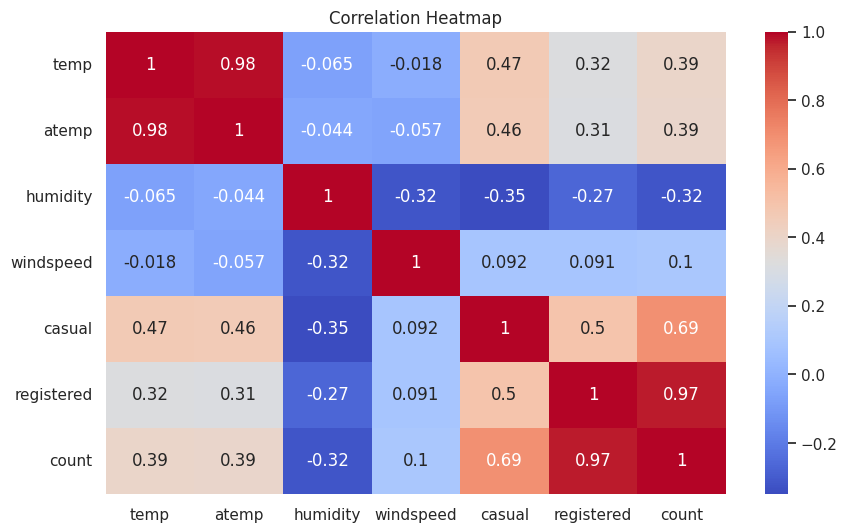

In [113]:
custom_palette = sns.color_palette("coolwarm", as_cmap=True)

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap=custom_palette)


plt.title("Correlation Heatmap")

plt.show()


From the correlation we can verify some logical points:
- feeling temperature or aparent temprature and temp are highly correlated, because they are most of the times approximately the same have a very small diffrerence
- count, causal, registered are all correlated to each other because all of them

In [114]:
# Dropping highly correlated columns -
dfn = df.drop(columns=['casual', 'registered', 'atemp'])

## Understanding the distribution of numerical values

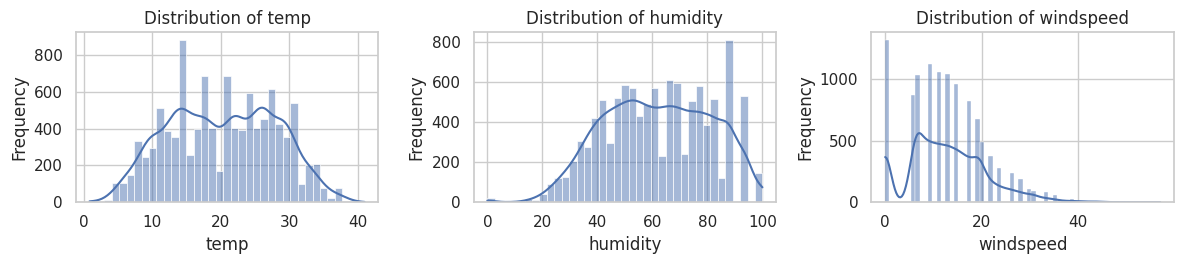

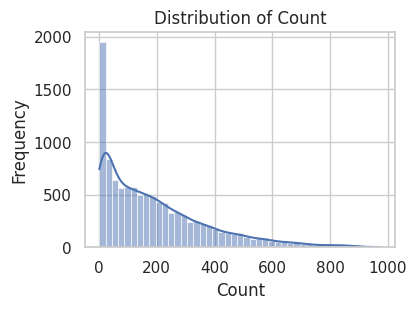

In [115]:
num_cols = ['temp', 'humidity', 'windspeed', 'count']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 2.8))

# Iterate through the numerical columns
for col, ax in zip(num_cols, axes.flatten()):
    sns.histplot(df[col], ax=ax, kde=True)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

plt.figure(figsize=(4, 2.8))
sns.histplot(df['count'], kde=True)
plt.title('Distribution of Count')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.show()


# Inference
1. The distributions of 'casual', 'registered', and 'count' exhibit characteristics similar to a Log Normal Distribution.
2. 'temp', 'atemp', and 'humidity' distributions appear to resemble the Normal Distribution.
3. The distribution of 'windspeed' appears to have qualities consistent with a binomial distribution.


# For categorical columns

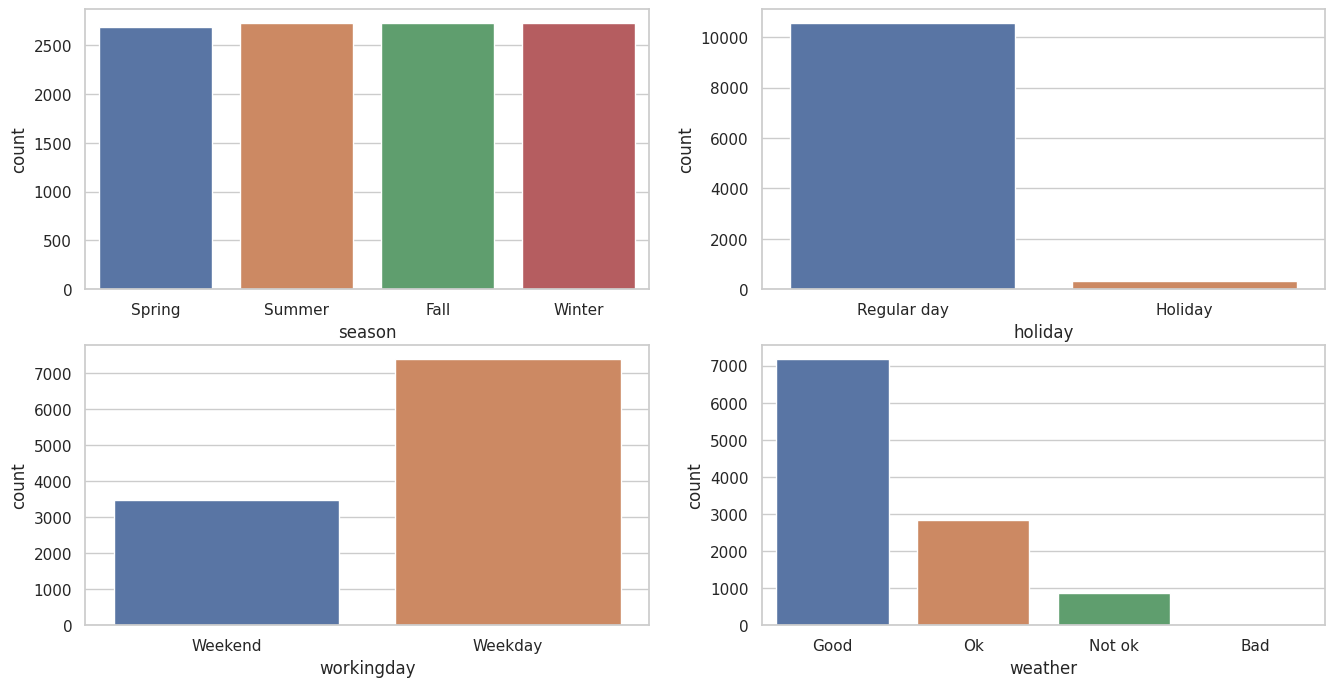

In [116]:
# countplot of each categorical column
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(16, 8))

index = 0
for row in range(2):
    for col in range(2):
        sns.countplot(data=df, x=cat_cols[index], ax=axis[row, col])
        index += 1

plt.show()

By these counplot we get quite obivous obsertion as non-working days are less working days and holidays are less than non holiday days.

Mostly the data have good weather and ok weather.

Count of season is nearly same.

## Outlier Detection

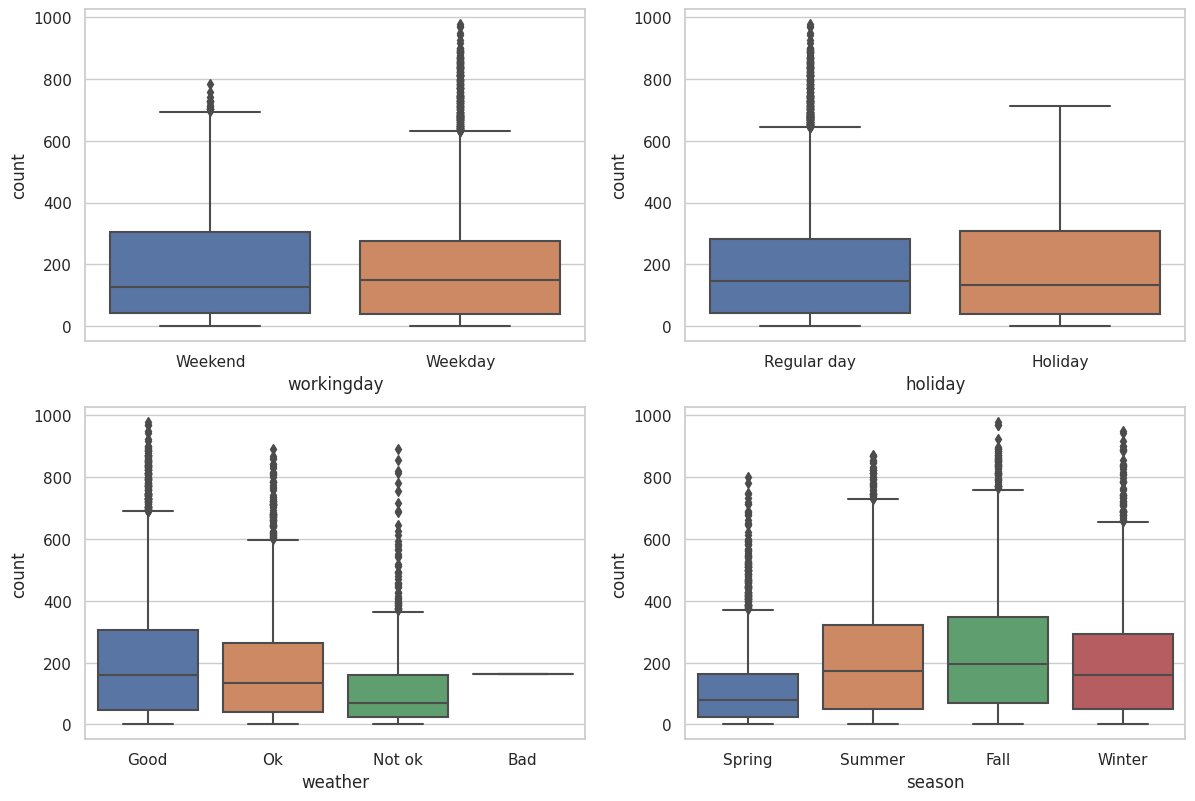

In [117]:
# Outlier Detection using Boxplots -
col_list = ['workingday',	'holiday',	'weather', 'season']
sns.set(style="whitegrid")
fig = plt.figure(figsize=(8, 25))
fig.subplots_adjust(right=1.5)

for plot in range(1, len(col_list)+1):
    plt.subplot(5, 2, plot)
    sns.boxplot(x=df[col_list[plot-1]], y=df['count'])

plt.show()

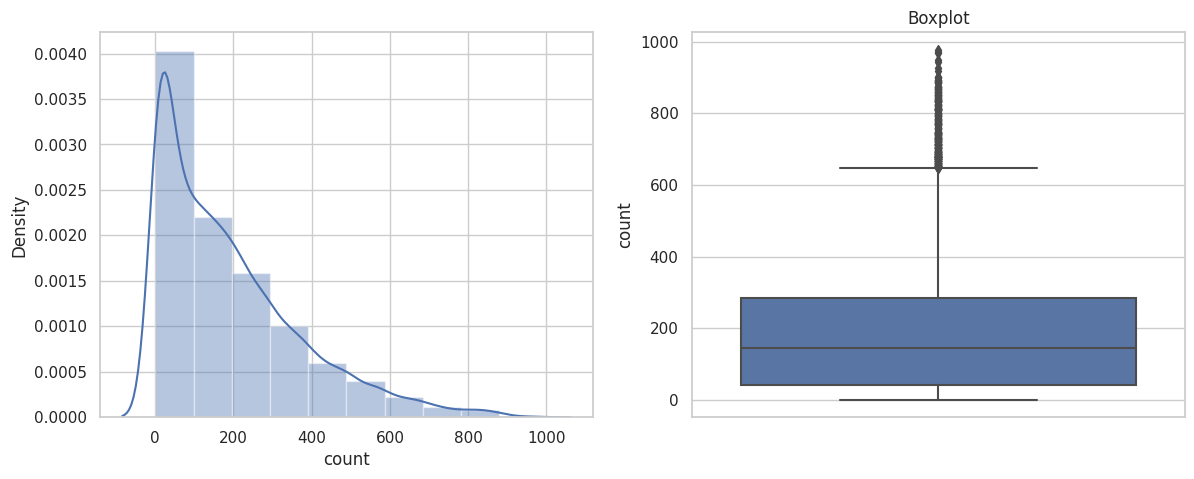

In [118]:
# Checking distribution of 'count' column -
plt.figure(figsize=(14, 5))

#Histogram
plt.subplot(1, 2, 1)
sns.distplot(df['count'], bins=10)

#Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=df['count'])
plt.title('Boxplot')

plt.show()

We can see that outliers are present in the given columns. We need to figure out a way to deal with them before starting with the hypothesis testing.

### Strategies for Managing Outliers
When faced with outliers in your dataset, several strategies can be employed to handle them effectively:

Contextual Assessment: Begin by understanding whether the outliers align with the context of your business problem. If they represent meaningful or legitimate data points, it may be appropriate to retain them in your analysis.

IQR-Based Removal: If outliers appear to be invalid or erroneous data points, you can utilize the Interquartile Range (IQR) method. This method identifies values lying outside the IQR boundaries and allows for their removal from the dataset.

Log Transformation: Another approach is to apply a log transformation to the data. This technique can help mitigate the influence of outliers while preserving the integrity of the dataset.

### Key Considerations
In the dataset under examination, outliers pertain to the number of bike rides per session/day. These outliers may arise from exceptional circumstances, such as high demand on specific days or during special events.

It's crucial to recognize that these values hold significance for capturing fluctuations in the data. Consequently, the preferred approach for handling outliers in this context is to retain them.

However, the statistical tests we intend to apply often assume that the dataset follows a normal or approximately normal distribution. To align with this assumption, we'll address the outlier values using a logarithmic transformation method.

This balanced approach allows us to preserve the valuable information contained in the outliers while ensuring the dataset meets the assumptions of our chosen statistical methods.

#### Aggregating the total no. of bike rides based on the given factors

In [119]:
# 1. Workingday -
pd.DataFrame(df.groupby('workingday')['count'].describe())

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
Weekday,7412.0,193.011873,184.513659,1.0,41.0,151.0,277.0,977.0
Weekend,3474.0,188.506621,173.724015,1.0,44.0,128.0,304.0,783.0


In [120]:
# 2. Holiday -
pd.DataFrame(df.groupby('holiday')['count'].describe())

,count,mean,std,min,25%,50%,75%,max
holiday,,,,,,,,
Holiday,311.0,185.877814,168.300531,1.0,38.5,133.0,308.0,712.0
Regular day,10575.0,191.741655,181.513131,1.0,43.0,145.0,283.0,977.0


In [121]:
# 3. Season -
pd.DataFrame(df.groupby('season')['count'].describe())

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
Fall,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
Spring,2686.0,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0
Summer,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
Winter,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


In [122]:
# 4. Weather -
pd.DataFrame(df.groupby('weather')['count'].describe())

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
Bad,1.0,164.000000,NaN,164.0,164.0,164.0,164.0,164.0
Good,7192.0,205.236791,187.959566,1.0,48.0,161.0,305.0,977.0
Not ok,859.0,118.846333,138.581297,1.0,23.0,71.0,161.0,891.0
Ok,2834.0,178.955540,168.366413,1.0,41.0,134.0,264.0,890.0


# HYPOTHESIS TESTING

### Ques. 1 - Is there any significant difference between the no. of bike rides on weekdays and weekends?


#### **Step 1:** Define the null and alternate hypothesis

$H_0:$ The demand of bikes on weekdays is greater or similar to the demand of bikes on weekend.

$H_a:$ The demand of bikes on weekdays is less than the demand of bikes on weekend.

Let $\mu_1$ and $\mu_2$ be the average no. of bikes rented on weekdays and weekends respectively.

Mathematically, the above formulated hypothesis can be written as:

$H_0: \mu_1 >= \mu_2$

$H_a: \mu_1 < \mu_2$

#### **Step 2:** Select an appropriate test

Note that population standard deviation is unknown.

In [123]:
weekday = df[df['workingday'] == "Weekday"]['count'].sample(2500)
weekend = df[df['workingday'] == "Weekend"]['count'].sample(2500)

**Ques.** Why do we take same no. of samples from two different populations for conducting the tests?

**Ans.**
* Unequal sample sizes can lead to unequal variances between samples, which affects the assumption of equal variances in tests like t-test, ANOVA, etc.

* Having both unequal sample sizes and variances dramatically affects the statistical power of a test.


In [124]:
print('The sample standard deviation of the bike rides on weekday is:', round(weekday.std(), 2))
print('The sample standard deviation of the bike rides on weekend is:', round(weekend.std(), 2))

The sample standard deviation of the bike rides on weekday is: 184.96
The sample standard deviation of the bike rides on weekend is: 173.63


As the sample standard deviations are different, the population standard deviations can be assumed to be different.

This is a one-tailed test concerning two population means from two independent populations. As the population standard deviations are unknown, the two sample independent t-test will be the appropriate test for this problem.

#### **Step 3:** Decide the significance level

As given in the problem statement, we select α = 0.05.

In [125]:
alpha = 0.05

#### **Step 4:** Calculate the p-value



In [126]:
def result(p_value, alpha):
  if p_value < alpha:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
  else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

In [127]:
test_stat, p_value = stats.ttest_ind(weekday, weekend, equal_var=False, alternative='less')
print('The p-value is : ', p_value)

result(p_value, alpha)

The p-value is :  0.7038769242832257
As the p-value 0.7038769242832257 is greater than the level of significance, we fail to reject the null hypothesis.


**Observation:** Since the p-value is greater than the 5% significance level, we fail to reject the null hypothesis. Hence, we have enough statistical evidence to say that the average no. of bike rides during weekdays is greater than or equal to those on weekends.

### Ques. 2 - Is there any significant difference between the no. of bike rides on Holidays and Regular days?


#### **Step 1:** Define the null and alternate hypothesis

$H_0:$ The demand of bikes on rugalar days is greater or similar to the demand of bikes on holidays.

$H_a:$ The demand of bikes on regular days is less than the demand of bikes on holidays.

Let $\mu_1$ and $\mu_2$ be the average no. of bikes rented on regular days and holidays respectively.

Mathematically, the above formulated hypothesis can be written as:

$H_0: \mu_1 >= \mu_2$

$H_a: \mu_1 < \mu_2$

In [128]:
regularday = df[df['holiday'] == "Regular day"]['count'].sample(300)
holiday = df[df['holiday'] == "Holiday"]['count'].sample(300)

In [129]:
print('The sample standard deviation of the bike rides on weekday is:', round(regularday.std(), 2))
print('The sample standard deviation of the bike rides on weekend is:', round(holiday.std(), 2))

The sample standard deviation of the bike rides on weekday is: 176.9
The sample standard deviation of the bike rides on weekend is: 165.54


As the sample standard deviations are different, the population standard deviations can be assumed to be different.

This is a one-tailed test concerning two population means from two independent populations. As the population standard deviations are unknown, the two sample independent t-test will be the appropriate test for this problem.

#### **Step 3:** Decide the significance level

The significance level (α) is already set to 5% i.e., 0.05

#### **Step 4:** Calculate the p-value



In [130]:
test_stat, p_value = stats.ttest_ind(regularday, holiday, equal_var=False, alternative='less')
print('The p-value is : ', p_value)

result(p_value, alpha)

The p-value is :  0.6999359074117542
As the p-value 0.6999359074117542 is greater than the level of significance, we fail to reject the null hypothesis.


**Observation:** Since the p-value is greater than the 5% significance level, we fail to reject the null hypothesis. Hence, we have enough statistical evidence to say that the average no. of bike rides during regular days is greater than or equal to those on holidays.


### Ques. 3 - Is the demand of bicycles on rent same for different weather conditions?

#### **Step 1:** Define the null and alternate hypothesis

$H_0:$ The average no. of bike rides in different weather conditions  are equal.

$H_a:$ The average no. of bike rides in different weather conditions are not equal.

#### **Step 2:** Select an appropriate test


In [131]:
w1 = df[df['weather'] == "Good"]['count'].sample(750)
w2 = df[df['weather'] == "Ok"]['count'].sample(750)
w3 = df[df['weather'] == "Not ok"]['count'].sample(750)

In [132]:
df.groupby(['weather'])['count'].describe()

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
Bad,1.0,164.000000,NaN,164.0,164.0,164.0,164.0,164.0
Good,7192.0,205.236791,187.959566,1.0,48.0,161.0,305.0,977.0
Not ok,859.0,118.846333,138.581297,1.0,23.0,71.0,161.0,891.0
Ok,2834.0,178.955540,168.366413,1.0,41.0,134.0,264.0,890.0


This is a problem, concerning three independent population means. **One-way ANOVA** could be the appropriate test here provided normality and equality of variance assumptions are verified.

The ANOVA test has important assumptions that must be satisfied in order for the associated p-value to be valid.

* The samples are independent.
* Each sample is from a normally distributed population.
* The population variance of the groups are all equal.

Now, we will be using the following statistical tests to check the normality and equality of variance of the data set -

* For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

* For equality of variance, Levene test is applied to the response variable.

#### Shapiro-Wilk’s test -

We will test the null hypothesis

>$H_0:$ Count follows normal distribution

against the alternative hypothesis

>$H_a:$ Count doesn't follow normal distribution



In [133]:
# Assumption 1: Normality

w, p_value = stats.shapiro(df['count'].sample(4999))
print('The p-value is : ', p_value)

result(p_value, alpha)

The p-value is :  0.0
As the p-value 0.0 is less than the level of significance, we reject the null hypothesis.


#### Levene’s test -

We will test the null hypothesis

>$H_0$: All the count variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [134]:
#Assumption 2: Homogeneity of Variance

stat, p_value = stats.levene(w1, w2, w3)
print('The p-value is : ', p_value)

result(p_value, alpha)

The p-value is :  4.582300517523161e-15
As the p-value 4.582300517523161e-15 is less than the level of significance, we reject the null hypothesis.


**Note:** If these assumptions are not true for a given set of data (like in this case), it may still be possible to use the **Kruskal-Wallis H-test**

#### **Step 3:** Decide the significance level

The significance level (α) is already set to 5% i.e., 0.05

#### **Step 4:** Calculate the p-value

In [135]:
test_stat, p_value = stats.kruskal(w1, w2, w3)
print('The p-value is : ', p_value)

result(p_value, alpha)

The p-value is :  4.2339425101455757e-22
As the p-value 4.2339425101455757e-22 is less than the level of significance, we reject the null hypothesis.


**Observation:** Since the p-value is less than the 5% significance level, we reject the null hypothesis. Hence, we have enough statistical evidence to say that the average no. of bike rides in different weather conditions are not equal.


### Ques. 4 - Is the demand of bicycles on rent same for different sesons?

#### **Step 1:** Define the null and alternate hypothesis

$H_0:$ The average no. of bike rides in different seasons  are equal.

$H_a:$ The average no. of bike rides in different seasons are not equal.


#### **Step 2:** Select an appropriate test


In [136]:
gp_5 = df[df['season']=='Spring']['count'].sample(1000)
gp_6 = df[df['season']=='Summer']['count'].sample(1000)
gp_7 = df[df['season']=='Fall']['count'].sample(1000)
gp_8 = df[df['season']=='Winter']['count'].sample(1000)

As we data is not normally distributed. We will use  **Kruskal-Wallis H-test**.

#### **Step 3:** Decide the significance level

The significance level (α) is already set to 5% i.e., 0.05

#### **Step 4:** Calculate the p-value

In [137]:
test_stat, p_value = stats.kruskal(gp_5, gp_6, gp_7,gp_8)
print('The p-value is : ', p_value)

result(p_value, alpha)

The p-value is :  4.982210005074565e-63
As the p-value 4.982210005074565e-63 is less than the level of significance, we reject the null hypothesis.


**Observation:** Since the p-value is less than the 5% significance level, we reject the null hypothesis. Hence, we have enough statistical evidence to say that the average no. of bike rides in different seasons are not equal.


### Ques. 5 - Is weather dependent of seasons?

#### **Step 1:** Define the null and alternate hypothesis

$H_0:$ weather is independent of the seasons.

$H_a:$ weather is dependent on the seasons.


#### **Step 2:** Select an appropriate test

As this categorical vs categorical data we will use **chi_sqaure test**.

#### **Step 3:** Decide the significance level

The significance level (α) is already set to 5% i.e., 0.05

#### **Step 4:** Calculate the p-value

In [138]:
test_stat, p_value = stats.kruskal(w1, w2, w3)
print('The p-value is : ', p_value)

result(p_value, alpha)

The p-value is :  4.2339425101455757e-22
As the p-value 4.2339425101455757e-22 is less than the level of significance, we reject the null hypothesis.


In [139]:
data = pd.crosstab(df['season'], df['weather'])
chi_stats, p_value, dof, exp = stats.chi2_contingency(data)
print('The p-value is : ', p_value)

result(p_value, alpha)

The p-value is :  1.549925073686492e-07
As the p-value 1.549925073686492e-07 is less than the level of significance, we reject the null hypothesis.


**Observation:** Since the p-value is less than the 5% significance level, we reject the null hypothesis. Hence, we have enough statistical evidence to say that weather is dependent of seasons.

# Reject Null Hypothesis

The obtained p-value, which is approximately 1.55e-07, is significantly lower than the chosen significance level of 0.05.

As a result, we have enough evidence to reject the null hypothesis.

Therefore, we can confidently conclude that Weather is dependent on the Season.

#### **Key EDA Insights -**

* The dataset comprises a total of 10,886 rows.

* Notably, no missing values or duplicate rows were identified in the dataset.

* A high correlation was observed between the 'temp' and 'atemp' columns.

* To mitigate multicollinearity, one of these columns ('atemp') was dropped.

* Further investigation revealed strong correlations between the 'count', 'casual', and 'registered' columns. To prevent multicollinearity, the 'casual' and 'registered' columns were removed.

* Outliers were detected within the 'count' column.

#### **Hypothesis Testing Insights -**


* Weekdays exhibit a higher bike rental rate compared to weekends.

* Regular days see greater bike rental activity than holidays.

* Bike rental demand varies with changing weather conditions.

* Distinct seasons influence the demand for rented bicycles.

* Weather conditions are interrelated with the current season.

#### **Miscellaneous observations -**
The distribution of 'count' column wasn't actually normal or near normal. </br> Infact the column's distribution is found to be a bit skewed towards right.

#### **Generic recommendations -**

* The demand of bikes on rent are usually higher during Weekdays.
* The demand of bikes on rent are usually higher during Regular days.
* The chances of person renting a bike are usually higher during Fall Season .
* The chances of person renting a bike are usually higher during Good Weather condition.

We recommend the company to maintain the bike stocks accordingly